In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
p_cancer = np.load('p_cancer_full.npy')

In [73]:
parameters = np.load('p_cancer_fulltrial_parameters.npz')
gammas = parameters['gammas']
Ks = parameters['Ks']
Ncrit = parameters['Ncrit']
dens0 = parameters['dens0']
T_p = parameters['T_p']
r_b = parameters['r_b']
s_p = parameters['s_p']
T_d = parameters['T_d']
s_d = parameters['s_d']
r_d = parameters['r_d']

In [79]:
Kcrit = (T_p * r_b**2 * s_p) / (T_d * s_d**2 * (r_b - r_d))

In [164]:
Ncrit = (T_p * r_b * s_p) / (T_d * s_d**2)

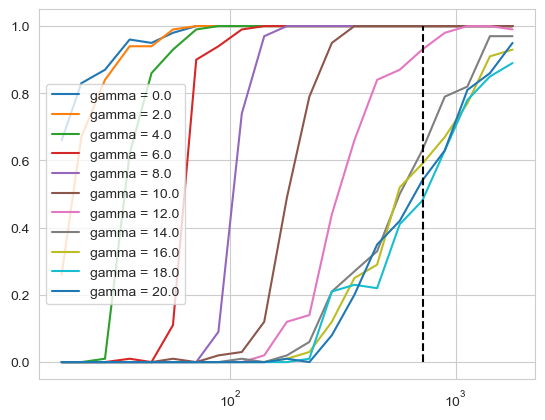

In [83]:
# plt.plot(gammas, p_cancer.mean(-1))
for i, gamma in enumerate(gammas):
    plt.plot(Ks, p_cancer[i].mean(-1), label='gamma = {}'.format(gamma)) if i % 2 == 0 else None
    
plt.legend()
plt.vlines(Kcrit, 0, 1, color='k', ls='--')
plt.xscale('log')

In [68]:
dens0

array(0.25)

In [112]:
p_cancer.shape

(21, 21, 100)

In [125]:
p_d = 1e-8 * T_d
p_p = 1e-8 * T_p
r_b, r_d, Ks, p_d, s_d, s_p, p_p

(array(0.5),
 array(0.375),
 array([  18.,   22.,   28.,   36.,   45.,   56.,   71.,   89.,  113.,
         142.,  179.,  225.,  283.,  356.,  449.,  565.,  711.,  895.,
        1127., 1418., 1786.]),
 7e-06,
 array(0.1),
 array(0.0005),
 0.05)

In [148]:
(r_b - r_d) / (r_d * p_p * s_p)

13333.333333333332

Text(0.5, 0, 'Rest channel weight $\\gamma$')

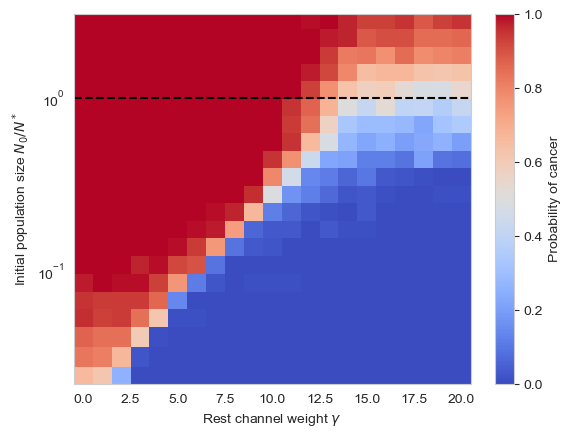

In [211]:
dgamma = (gammas[1] - gammas[0])/2
dK = (Ks[1] - Ks[0])/2
X, Y = np.meshgrid(gammas, Ks, indexing='ij')
X_edges, Y_edges = np.meshgrid(
    np.concatenate([gammas, [gammas[-1] + (gammas[1] - gammas[0])]]),  # Add an extra edge for X
    np.concatenate([Ks, [Ks[-1] * (Ks[1] / Ks[0])]])  # Add an extra edge for Y (log scale)
)
X_edges -= dgamma
Y_edges -= dK
cp = plt.pcolormesh(X_edges, Y_edges * dens0 / Ncrit, p_cancer.mean(-1).T, cmap='coolwarm', shading='auto', vmin=0, vmax=1)
# plt.contour(X, Y, dv.T, levels=[0], colors='k', origin='lower')
# plt.contour(X, Y, dT.T, levels=[-1e5, 0, 1e4], colors='k', origin='lower')
# plt.contourf(X, Y, p_cancer.mean(-1), levels=[0, .4, .6, 1], cmap='coolwarm', origin='lower')
# plt.contour(X, Y, p_cancer.mean(-1), levels=[.4, .5, .6], cmap='coolwarm', origin='lower')
# plt.imshow(p_cancer.mean(-1).T, aspect='auto', extent=[gammas[0]-dgamma, gammas[-1]+dgamma, Ks[0]-dK, Ks[-1]+dK], cmap='coolwarm', origin='lower')
plt.colorbar(cp, label='Probability of cancer')
# plt.hlines(Kcrit, gammas[0]-dgamma, gammas[-1]+dgamma, color='k', ls='--')
plt.hlines(1, gammas[0]-dgamma, gammas[-1]+dgamma, color='k', ls='--')

# plt.plot(gammas, 1 / (2 * np.sqrt((r_b-r_d)/(2 + np.exp(gammas)))), 'k--')
plt.ylabel('Initial population size $N_0/N^*$')
plt.yscale('log')
plt.xlabel('Rest channel weight $\gamma$')
# add colorbar

In [204]:
# analytical tries difficult
# v = 2 * np.sqrt((r_b-r_d)/(2 + np.exp(X))) * (1 - 1 / np.log(1/Y)**2)
# pv = 1 / (2 + np.exp(X))
# N0 = dens0 * Y
# v = N0**2 * pv
# dN = (r_d/r_b)**2 * p_p * s_p * (N0 / Ncrit - 1)
# dv = N0 * v + dN